# Machine Predictive Maintenance Classification

## Data Loading

In [1]:
# Importing dataset via kaggle

!kaggle datasets download -d shivamb/machine-predictive-maintenance-classification

Dataset URL: https://www.kaggle.com/datasets/shivamb/machine-predictive-maintenance-classification
License(s): CC0-1.0
100%|█████████████████████████████████████████| 137k/137k [00:00<00:00, 189kB/s]
100%|█████████████████████████████████████████| 137k/137k [00:00<00:00, 189kB/s]


In [2]:
# Exporting dataset from zipfile

import zipfile
zip_ref = zipfile.ZipFile('/home/bhxveshhh/ML/Machine Predictive Maintenance Classification/machine-predictive-maintenance-classification.zip', 'r')
zip_ref.extractall('/home/bhxveshhh/ML/Machine Predictive Maintenance Classification')
zip_ref.close()

## Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [70]:
df = pd.read_csv('predictive_maintenance.csv')

In [6]:
df.head(5)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [7]:
df.shape

(10000, 10)

In [8]:
df.size

100000

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
UDI,10000.0,5000.50000,2886.895680,1.0,2500.75,5000.5,7500.25,10000.0
Air temperature [K],10000.0,300.00493,2.000259,295.3,298.30,300.1,301.50,304.5
Process temperature [K],10000.0,310.00556,1.483734,305.7,308.80,310.1,311.10,313.8
Rotational speed [rpm],10000.0,1538.77610,179.284096,1168.0,1423.00,1503.0,1612.00,2886.0
Torque [Nm],10000.0,39.98691,9.968934,3.8,33.20,40.1,46.80,76.6
Tool wear [min],10000.0,107.95100,63.654147,0.0,53.00,108.0,162.00,253.0
Target,10000.0,0.03390,0.180981,0.0,0.00,0.0,0.00,1.0


In [11]:
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df.nunique()

UDI                        10000
Product ID                 10000
Type                           3
Air temperature [K]           93
Process temperature [K]       82
Rotational speed [rpm]       941
Torque [Nm]                  577
Tool wear [min]              246
Target                         2
Failure Type                   6
dtype: int64

In [16]:
unique_failure = df['Failure Type'].unique()
print(unique_failure)

['No Failure' 'Power Failure' 'Tool Wear Failure' 'Overstrain Failure'
 'Random Failures' 'Heat Dissipation Failure']


In [17]:
df['Failure Type'].value_counts()

Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64

## Data Visualization

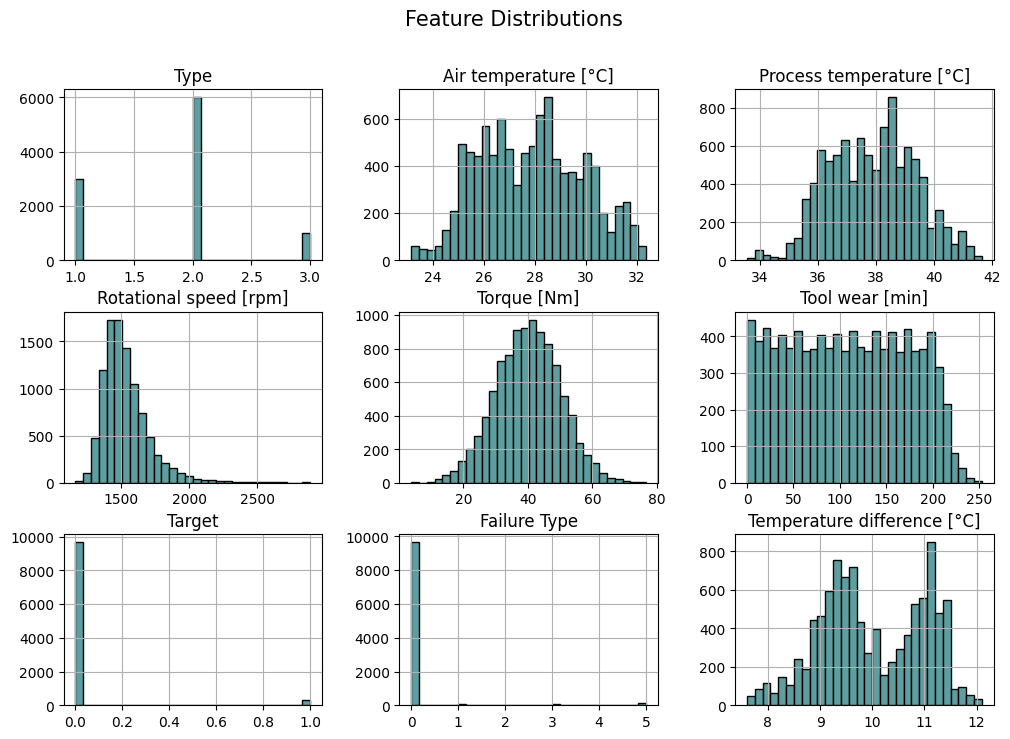

In [88]:
# Histogram for each feature

df.hist(figsize=(12, 8), bins=30, edgecolor='black', color='cadetblue', linewidth=1.0)
plt.suptitle("Feature Distributions", fontsize=15)
plt.show()

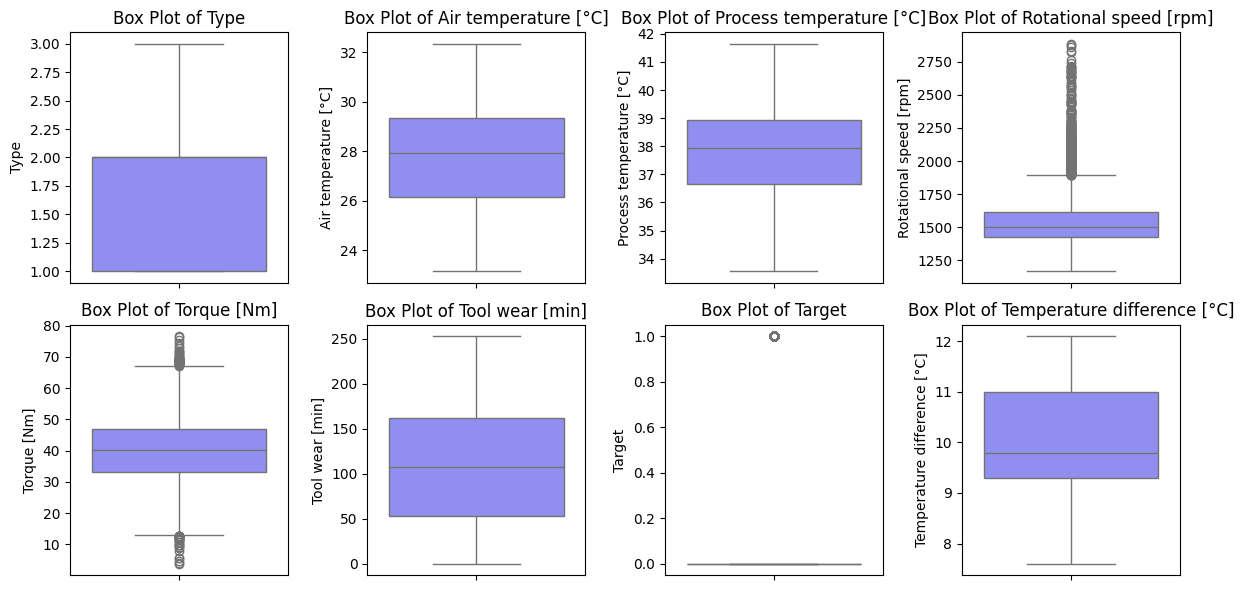

In [ ]:
# Box Plot for each feature

features = df.columns.drop(['Failure Type'])

plt.figure(figsize=(12, 6))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=df[feature], palette='cool')
    plt.title(f"Box Plot of {feature}")
    plt.tight_layout()

plt.show()

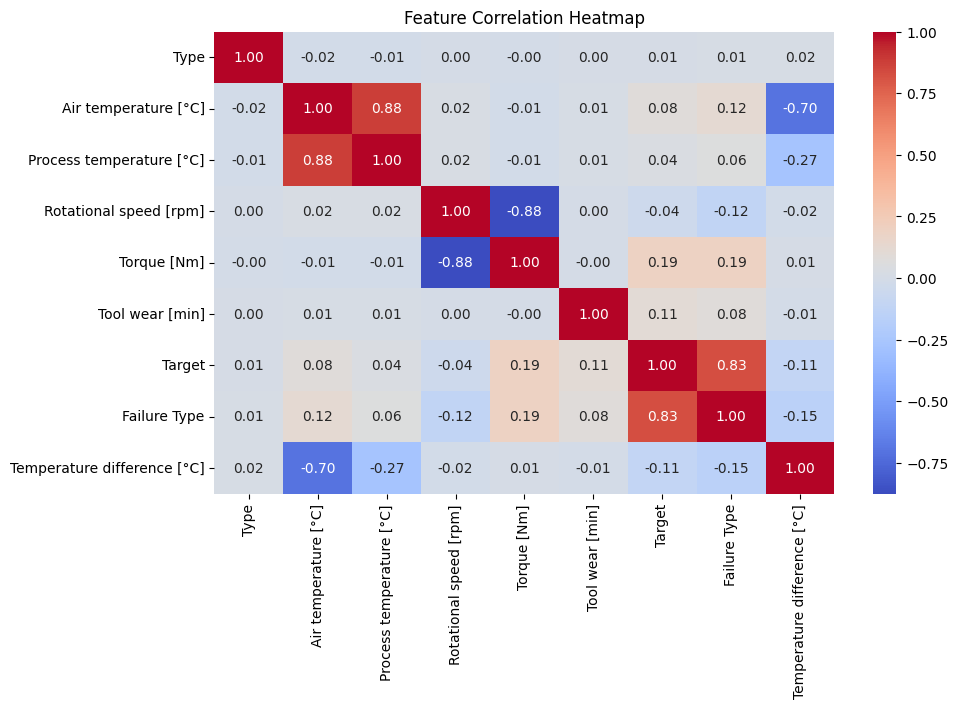

In [96]:
# Correlation Matrix

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

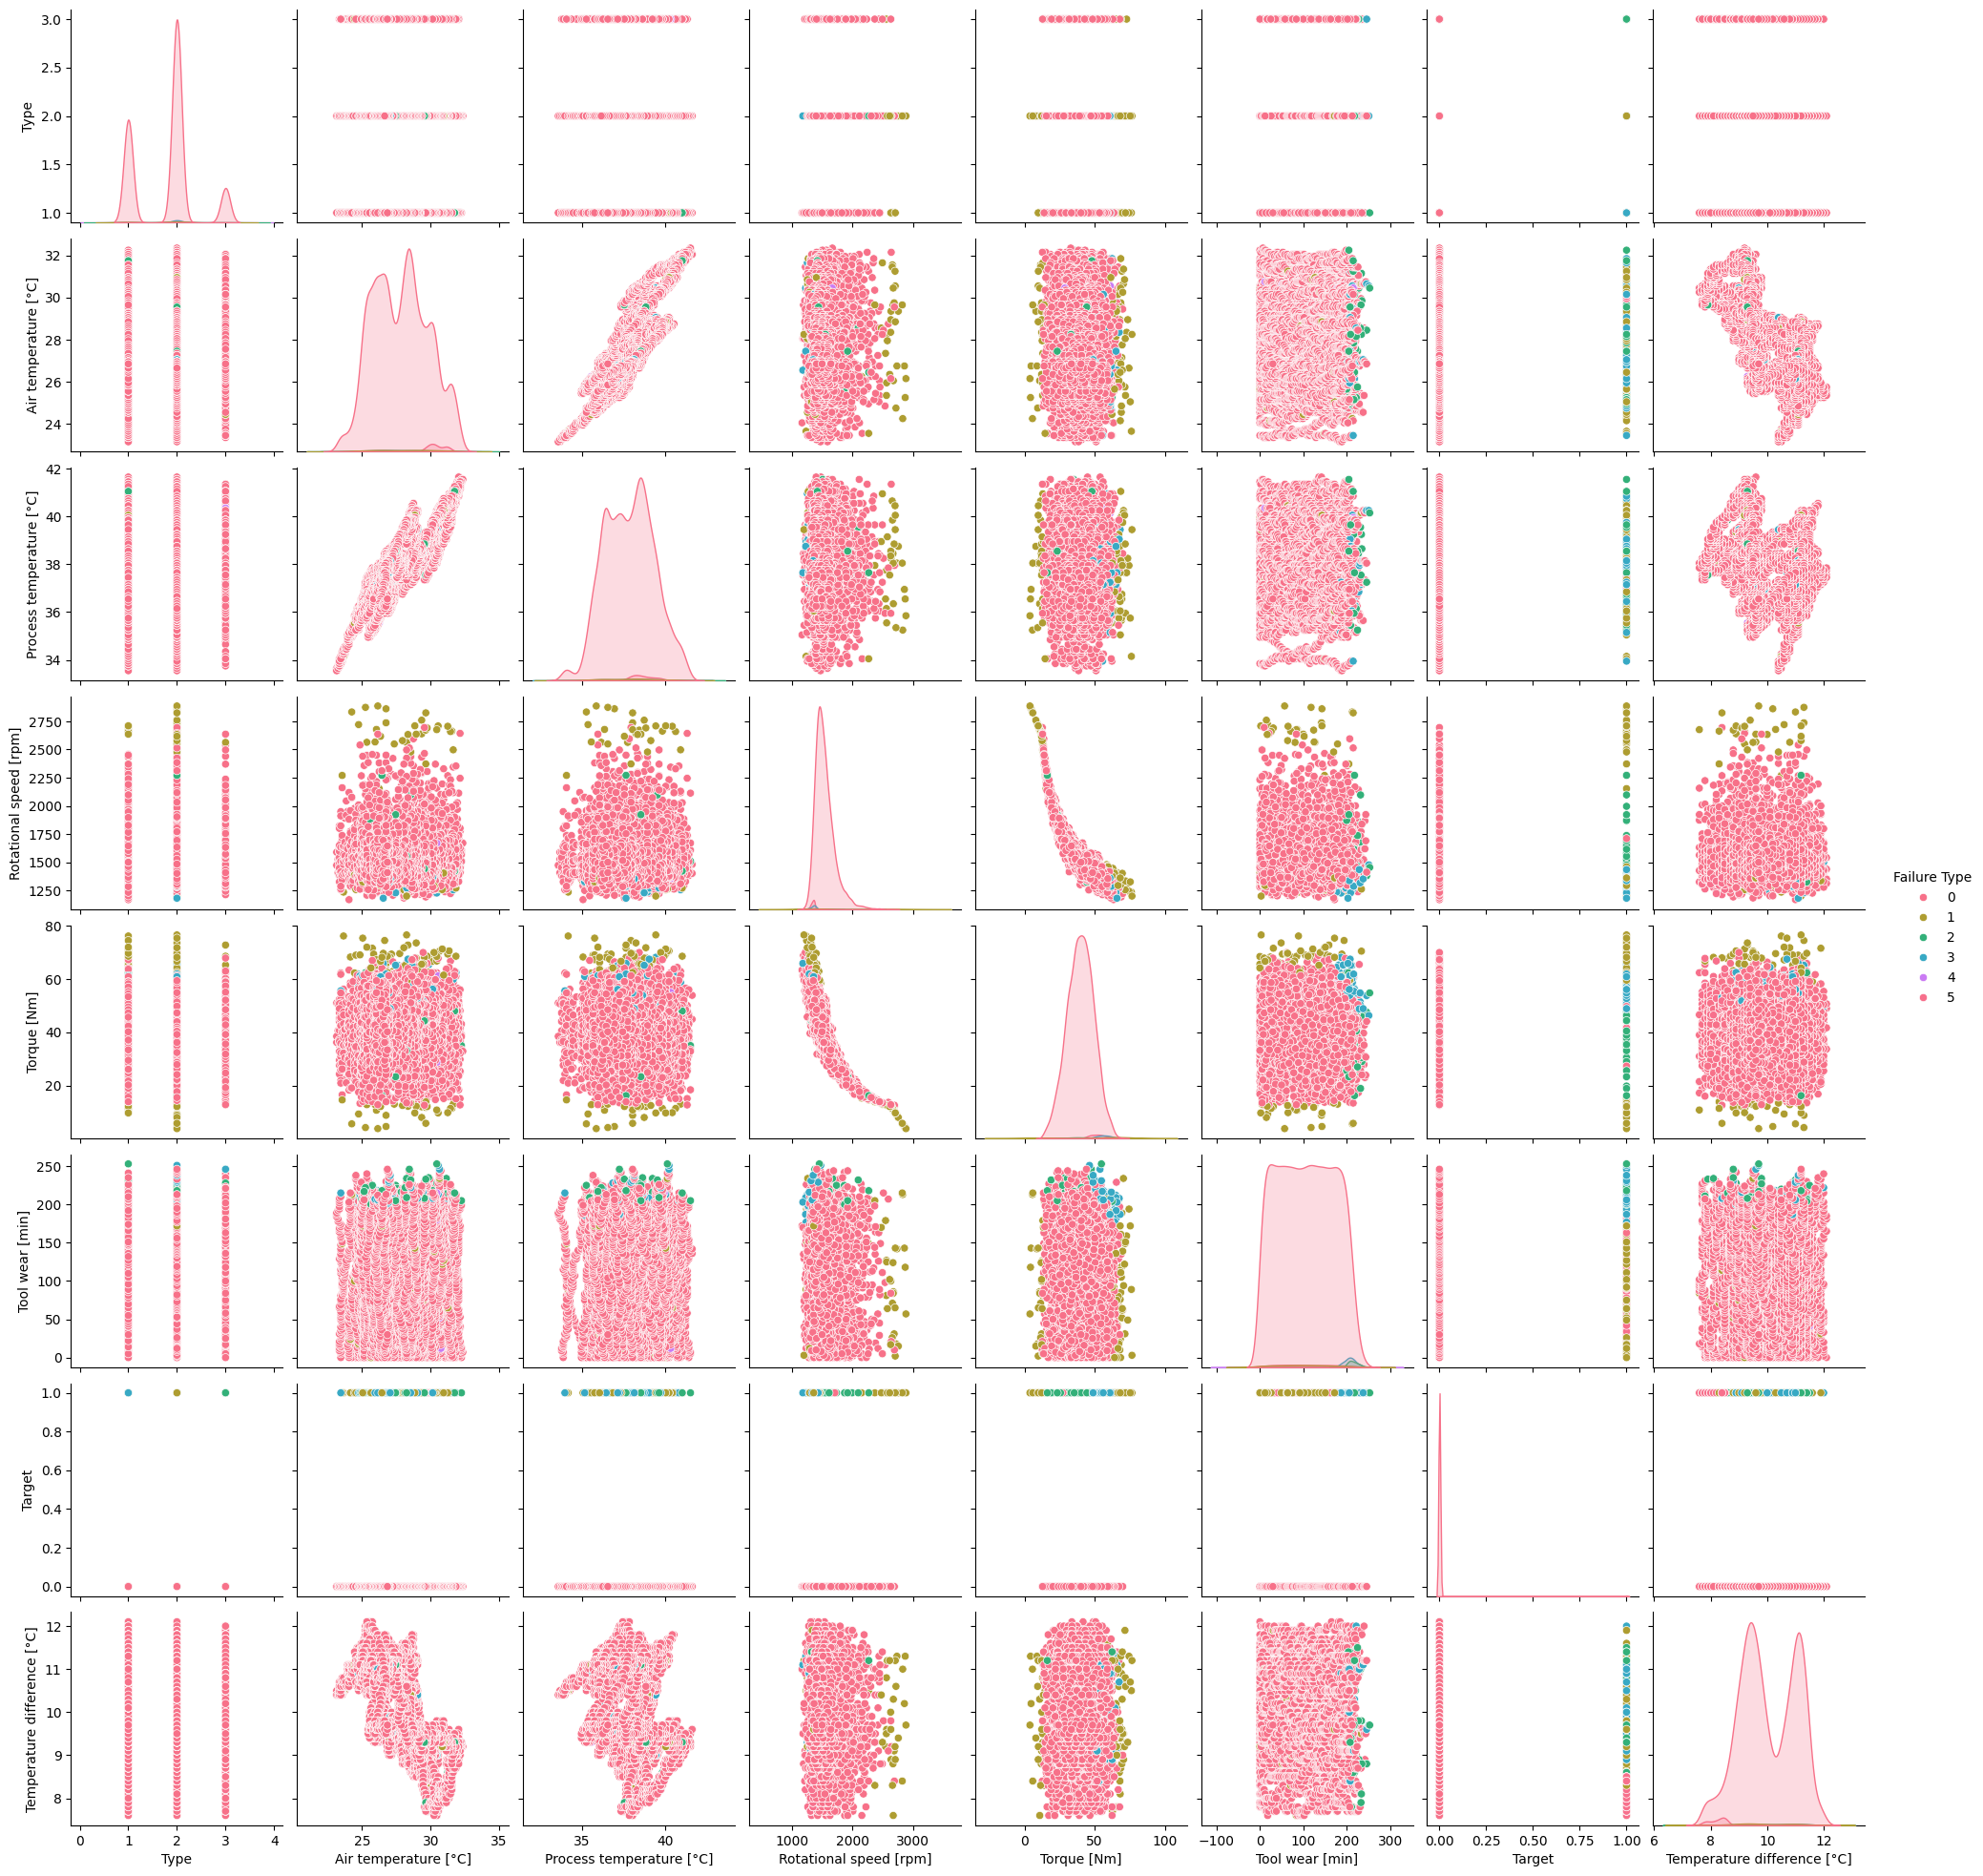

In [97]:
# Pairplot for feature relationships

sns.pairplot(df, hue="Failure Type", diag_kind="kde", palette="husl")
plt.show()

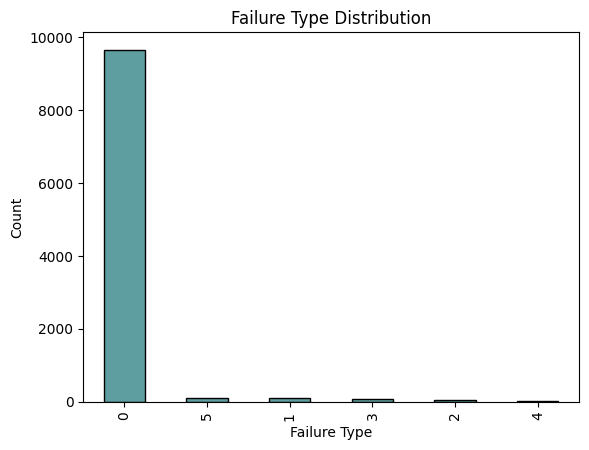

In [99]:
# Bar Plot for Failure Type Count

df['Failure Type'].value_counts().plot(kind='bar', color='cadetblue', edgecolor='black')
plt.title("Failure Type Distribution")
plt.xlabel("Failure Type")
plt.ylabel("Count")
plt.show()

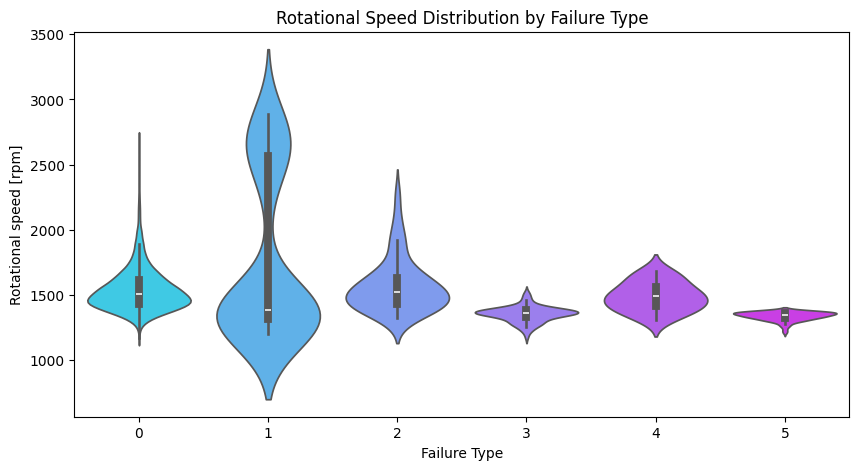

In [100]:
# Violin Plot for Rotational Speed vs. Failure Type

plt.figure(figsize=(10, 5))
sns.violinplot(x="Failure Type", y="Rotational speed [rpm]", data=df, palette="cool")
plt.title("Rotational Speed Distribution by Failure Type")
plt.show()

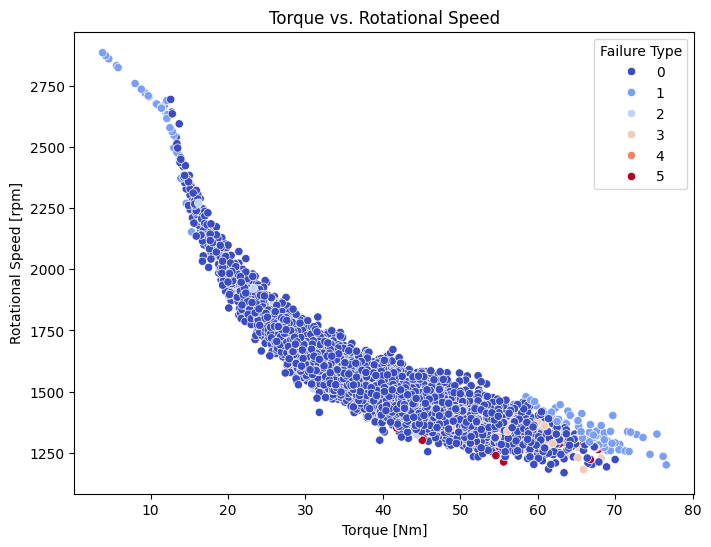

In [101]:
# Scatter Plot for Torque vs. Rotational Speed

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["Torque [Nm]"], y=df["Rotational speed [rpm]"], hue=df["Failure Type"], palette="coolwarm")
plt.title("Torque vs. Rotational Speed")
plt.xlabel("Torque [Nm]")
plt.ylabel("Rotational Speed [rpm]")
plt.show()

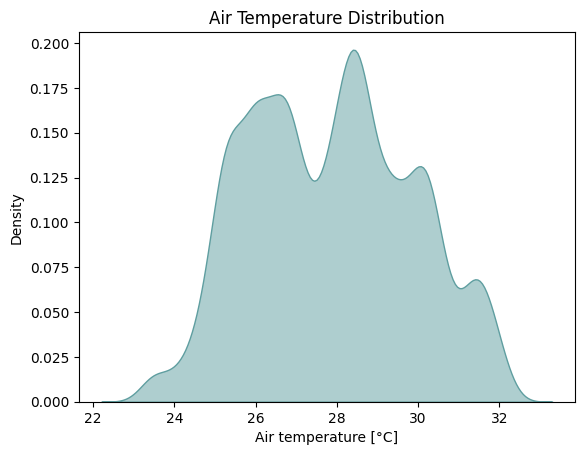

In [104]:
# KDE Plot for Air Temperature

sns.kdeplot(df["Air temperature [°C]"], fill=True, color="cadetblue", alpha=0.5)
plt.title("Air Temperature Distribution")
plt.xlabel("Air temperature [°C]")
plt.show()

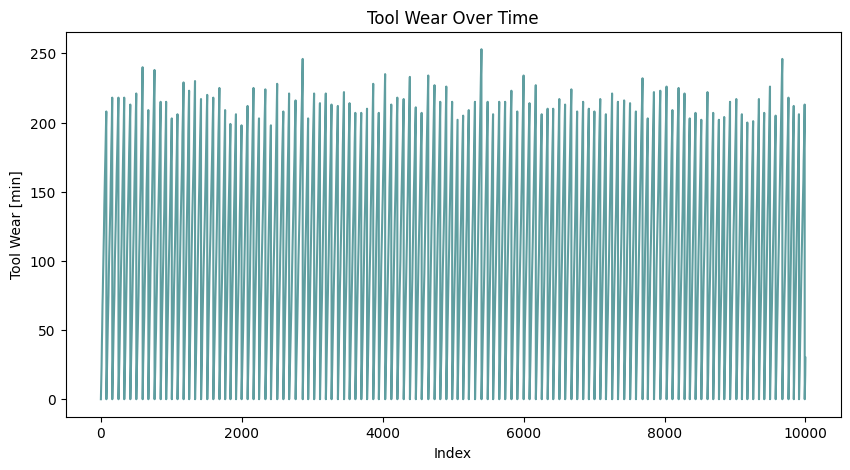

In [106]:
# Line Plot for Tool Wear Over Time

plt.figure(figsize=(10, 5))
sns.lineplot(x=df.index, y=df["Tool wear [min]"], color='cadetblue')
plt.title("Tool Wear Over Time")
plt.xlabel("Index")
plt.ylabel("Tool Wear [min]")
plt.show()

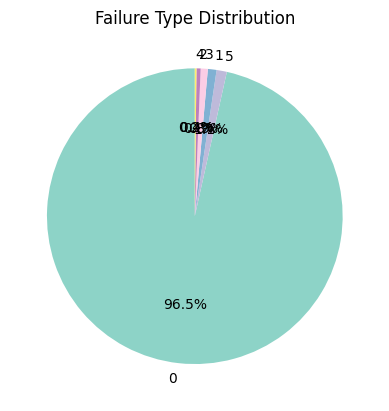

In [107]:
# Failure Type Distribution using Pie Chart

df["Failure Type"].value_counts().plot(kind='pie', autopct='%1.1f%%', cmap="Set3", startangle=90)
plt.ylabel("")
plt.title("Failure Type Distribution")
plt.show()

## Data Preprocessing

In [71]:
# Dropping unwanted columns

df = df.drop(["UDI","Product ID"],axis=1)

In [72]:
# Convverting tempretures from Kelvin to Centigrate

df["Air temperature [K]"] = df["Air temperature [K]"] - 272.15
df["Process temperature [K]"] = df["Process temperature [K]"] - 272.15

# Renaming temperature in Centigrate(°C) from Kelvin (K)
df.rename(columns={"Air temperature [K]" : "Air temperature [°C]","Process temperature [K]" : "Process temperature [°C]"},inplace=True)

df["Temperature difference [°C]"] = df["Process temperature [°C]"] - df["Air temperature [°C]"]

In [73]:
# Ordinal Encoding

import category_encoders as ce

encoder = ce.OrdinalEncoder(cols=['Type','Failure Type'])
df = encoder.fit_transform(df)

In [74]:
# Label Encoder

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Failure Type'] = le.fit_transform(df['Failure Type'])

In [75]:
X = df.drop('Failure Type', axis=1)
y = df['Failure Type']

In [76]:
# Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
# Renaming columns to remove special characters

X_train.columns = X_train.columns.str.replace('[\[\]<>]', '', regex=True)
X_test.columns = X_test.columns.str.replace('[\[\]<>]', '', regex=True)

In [78]:
# Dealing with Imbalanced Dataset

from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(sampling_strategy='not majority', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print("Class distribution after SMOTE:", Counter(y_train_resampled))

Class distribution after SMOTE: Counter({0: 7717, 1: 7717, 5: 7717, 2: 7717, 3: 7717, 4: 7717})


## Model Building

In [79]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

In [80]:
logistic_clf = LogisticRegression()
ridge_clf = RidgeClassifier()
xgboost_clf = XGBClassifier()
random_forest_clf = RandomForestClassifier()
ada_boost_clf = AdaBoostClassifier()
grad_boost_clf = GradientBoostingClassifier()
bagging_clf = BaggingClassifier()
decision_tree_clf = DecisionTreeClassifier()
svm_clf = SVC()

In [81]:
model_li = [logistic_clf, ridge_clf, xgboost_clf, random_forest_clf, 
            ada_boost_clf, grad_boost_clf, bagging_clf, decision_tree_clf, svm_clf]

scores = []
for model in model_li:
    model.fit(X_train_resampled, y_train_resampled)
    scores.append(accuracy_score(y_test, model.predict(X_test)))

print(scores)

[0.2855, 0.703, 0.991, 0.9905, 0.9205, 0.958, 0.985, 0.978, 0.4145]


## Model Evaluation

In [82]:
from sklearn.metrics import classification_report, confusion_matrix

Model: LogisticRegression
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      1935
           1       0.00      0.00      0.00        20
           2       0.00      0.00      0.00        11
           3       0.38      0.23      0.29        13
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00        15

    accuracy                           0.97      2000
   macro avg       0.22      0.21      0.21      2000
weighted avg       0.94      0.97      0.96      2000

Confusion Matrix:
 [[1934    0    0    1    0    0]
 [  16    0    0    1    0    3]
 [   9    0    0    2    0    0]
 [  10    0    0    3    0    0]
 [   6    0    0    0    0    0]
 [  14    0    0    1    0    0]]


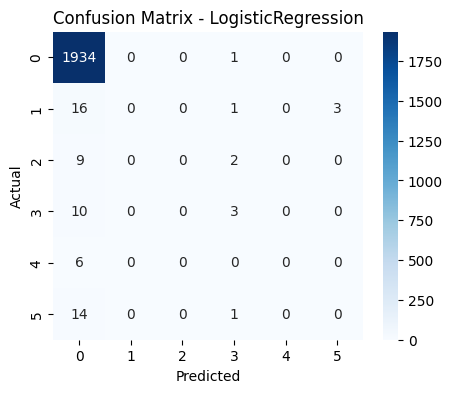

Model: RidgeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1935
           1       1.00      0.55      0.71        20
           2       0.00      0.00      0.00        11
           3       0.00      0.00      0.00        13
           4       0.00      0.00      0.00         6
           5       0.30      1.00      0.46        15

    accuracy                           0.98      2000
   macro avg       0.38      0.42      0.36      2000
weighted avg       0.98      0.98      0.98      2000

Confusion Matrix:
 [[1933    0    0    0    0    2]
 [   0   11    0    0    0    9]
 [   0    0    0    0    0   11]
 [   0    0    0    0    0   13]
 [   6    0    0    0    0    0]
 [   0    0    0    0    0   15]]


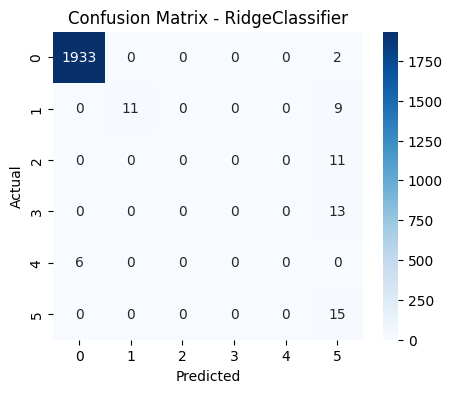

Model: XGBClassifier
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1935
           1       1.00      0.85      0.92        20
           2       1.00      0.73      0.84        11
           3       0.81      1.00      0.90        13
           4       0.00      0.00      0.00         6
           5       0.88      1.00      0.94        15

    accuracy                           0.99      2000
   macro avg       0.78      0.76      0.77      2000
weighted avg       0.99      0.99      0.99      2000

Confusion Matrix:
 [[1935    0    0    0    0    0]
 [   0   17    0    1    0    2]
 [   1    0    8    2    0    0]
 [   0    0    0   13    0    0]
 [   6    0    0    0    0    0]
 [   0    0    0    0    0   15]]


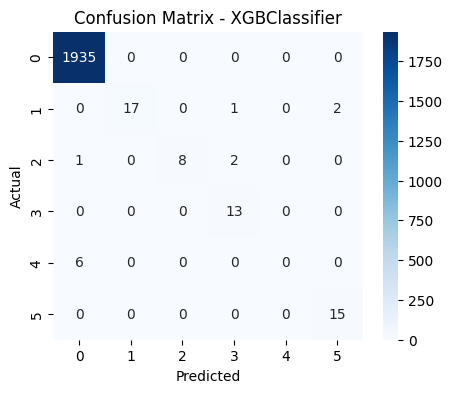

Model: RandomForestClassifier
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1935
           1       0.94      0.85      0.89        20
           2       1.00      0.91      0.95        11
           3       0.86      0.92      0.89        13
           4       0.00      0.00      0.00         6
           5       0.83      1.00      0.91        15

    accuracy                           0.99      2000
   macro avg       0.77      0.78      0.77      2000
weighted avg       0.99      0.99      0.99      2000

Confusion Matrix:
 [[1934    0    0    0    0    1]
 [   0   17    0    1    0    2]
 [   0    0   10    1    0    0]
 [   0    1    0   12    0    0]
 [   6    0    0    0    0    0]
 [   0    0    0    0    0   15]]


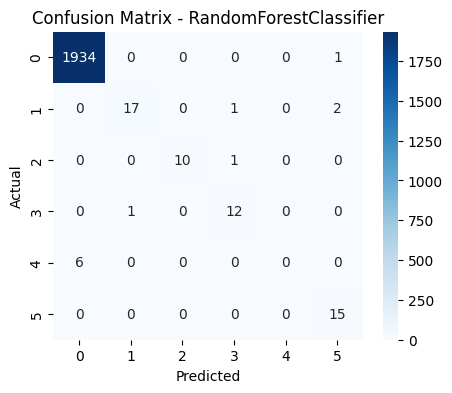

Model: AdaBoostClassifier
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1935
           1       0.84      0.80      0.82        20
           2       0.82      0.82      0.82        11
           3       0.69      0.69      0.69        13
           4       0.00      0.00      0.00         6
           5       0.82      0.93      0.88        15

    accuracy                           0.99      2000
   macro avg       0.70      0.71      0.70      2000
weighted avg       0.99      0.99      0.99      2000

Confusion Matrix:
 [[1934    0    0    0    0    1]
 [   0   16    0    2    0    2]
 [   0    0    9    2    0    0]
 [   0    3    1    9    0    0]
 [   6    0    0    0    0    0]
 [   0    0    1    0    0   14]]


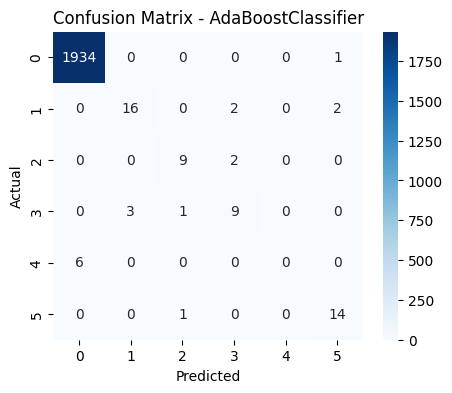

Model: GradientBoostingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1935
           1       0.94      0.80      0.86        20
           2       0.90      0.82      0.86        11
           3       0.79      0.85      0.81        13
           4       0.00      0.00      0.00         6
           5       0.88      1.00      0.94        15

    accuracy                           0.99      2000
   macro avg       0.75      0.74      0.75      2000
weighted avg       0.99      0.99      0.99      2000

Confusion Matrix:
 [[1935    0    0    0    0    0]
 [   0   16    0    2    0    2]
 [   1    0    9    1    0    0]
 [   0    1    1   11    0    0]
 [   6    0    0    0    0    0]
 [   0    0    0    0    0   15]]


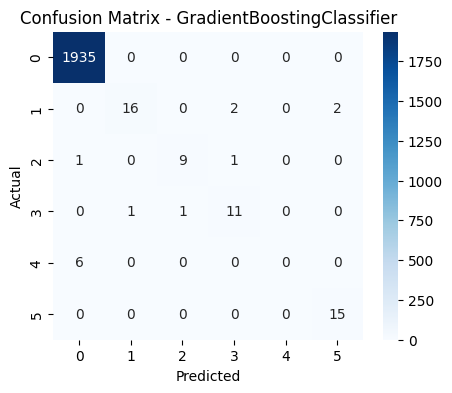

Model: BaggingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1935
           1       0.90      0.90      0.90        20
           2       1.00      0.82      0.90        11
           3       0.81      1.00      0.90        13
           4       0.00      0.00      0.00         6
           5       1.00      1.00      1.00        15

    accuracy                           0.99      2000
   macro avg       0.78      0.79      0.78      2000
weighted avg       0.99      0.99      0.99      2000

Confusion Matrix:
 [[1933    2    0    0    0    0]
 [   1   18    0    1    0    0]
 [   0    0    9    2    0    0]
 [   0    0    0   13    0    0]
 [   6    0    0    0    0    0]
 [   0    0    0    0    0   15]]


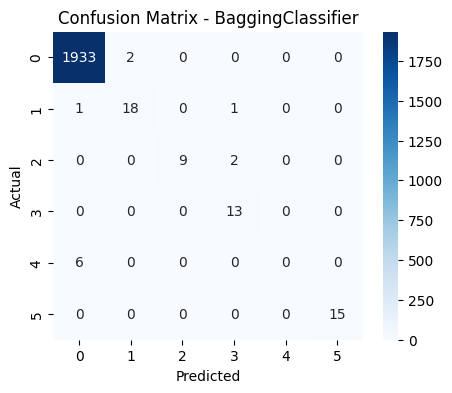

Model: DecisionTreeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      1935
           1       0.94      0.80      0.86        20
           2       1.00      0.82      0.90        11
           3       0.80      0.92      0.86        13
           4       0.00      0.00      0.00         6
           5       0.88      1.00      0.94        15

    accuracy                           0.99      2000
   macro avg       0.77      0.76      0.76      2000
weighted avg       0.99      0.99      0.99      2000

Confusion Matrix:
 [[1925    1    0    0    9    0]
 [   1   16    0    1    0    2]
 [   0    0    9    2    0    0]
 [   1    0    0   12    0    0]
 [   6    0    0    0    0    0]
 [   0    0    0    0    0   15]]


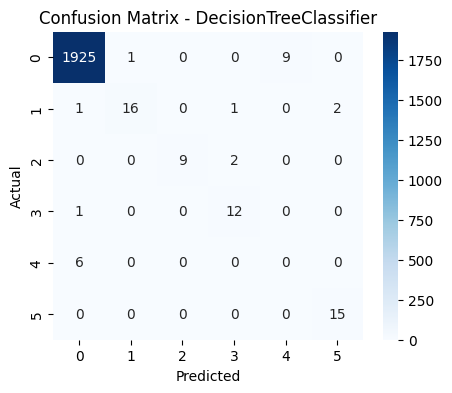

Model: SVC
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1935
           1       1.00      0.05      0.10        20
           2       0.00      0.00      0.00        11
           3       0.00      0.00      0.00        13
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00        15

    accuracy                           0.97      2000
   macro avg       0.33      0.18      0.18      2000
weighted avg       0.95      0.97      0.95      2000

Confusion Matrix:
 [[1935    0    0    0    0    0]
 [  19    1    0    0    0    0]
 [  11    0    0    0    0    0]
 [  13    0    0    0    0    0]
 [   6    0    0    0    0    0]
 [  15    0    0    0    0    0]]


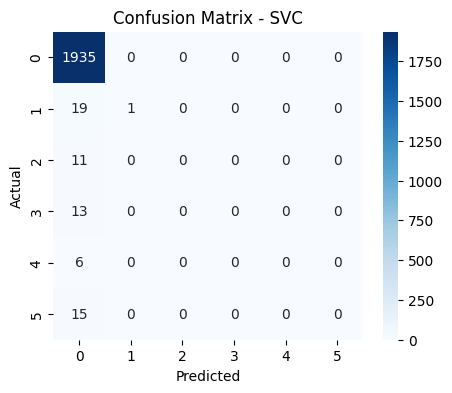

In [ ]:
for model in model_li:
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)

    print(f"Model: {model.__class__.__name__}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # Plot the confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model.__class__.__name__}")
    plt.show()